In [1]:
import pyfits
import numpy as np
import pylab as pl
import math as ma
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.cm as cm
import matplotlib.patches as patches
from matplotlib.ticker import AutoMinorLocator
import matplotlib
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredEllipse
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import Angle
import aplpy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Image Info
-------------------

In [2]:
datadir = '/Users/atetarenk/Desktop/ngc6256/'
fits_file1=datadir+'concat_clean1.pbcor.fits'
#cellsize in arcsec
cells=0.1
#extent of image you want for wcs axis version. coord0 lower left, coord1 upper right
coord0=SkyCoord('16h59m33.4s','-37d07m20.743s',frame='icrs')
coord1=SkyCoord('16h59m32.4s','-37d07m08.657s',frame='icrs')
#center and radius for aplpy version
coord_radio=SkyCoord(ra='16h59m32.90230s',dec='-37d07m14.27849s',frame='icrs')
wid=Angle(20*u.arcsec)
#rms noise in Jy
rmsnoise=2.8e-6
#contour levels
n=np.array([3,4,5])
ns=2.**(n/2.)
levels=ns*rmsnoise
#max and min brightness, and power law exponent scale (1. is none)
vmin=0
vmax=25e-6
gm=1.2

##*Read in wcs and beam info*

In [3]:
hdulist1 = fits.open(fits_file1)[0]
data1=hdulist1.data
wmap1=wcs.WCS(hdulist1.header)
b_major=Angle(hdulist1.header['BMAJ']*u.degree).arcsec/cells
b_minor=Angle(hdulist1.header['BMIN']*u.degree).arcsec/cells
b_pa=90.+hdulist1.header['BPA']
x1=float(wmap1.wcs_world2pix(coord0.ra.value,coord0.dec.value,0,0,1)[0])
y1=float(wmap1.wcs_world2pix(coord0.ra.value,coord0.dec.value,0,0,1)[1])
x2=float(wmap1.wcs_world2pix(coord1.ra.value,coord1.dec.value,0,0,1)[0])
y2=float(wmap1.wcs_world2pix(coord1.ra.value,coord1.dec.value,0,0,1)[1])

##*Shapes to draw on image*

In [4]:
#X-ray error circles
coord_swift=SkyCoord(ra=254.8870*u.degree,dec=-37.1207*u.degree,frame='icrs')
radsw=3.6
xsw=float(wmap1.wcs_world2pix(coord_swift.ra.value,coord_swift.dec.value,0,0,1)[0])
ysw=float(wmap1.wcs_world2pix(coord_swift.ra.value,coord_swift.dec.value,0,0,1)[1])

coord_chandra=SkyCoord(ra='16h59m32.90s',dec='-37d07m14.3s',frame='icrs')
radch=0.6
xch=float(wmap1.wcs_world2pix(coord_chandra.ra.value,coord_chandra.dec.value,0,0,1)[0])
ych=float(wmap1.wcs_world2pix(coord_chandra.ra.value,coord_chandra.dec.value,0,0,1)[1])

##**WCS axes version**

In [ ]:
#make contour version
fh = fits.open(fits_file1)
data = fh[0].data.squeeze() # drops the size-1 axes
header = fh[0].header
mywcs = wcs.WCS(header)
new_header = mywcs.to_header()
new_fh = fits.PrimaryHDU(data=data, header=new_header)
new_fh.writeto(fits_file1.strip('.fits')+'_contours.fits')
fits_file_c=fits_file1.strip('.fits')+'_contours.fits'

In [5]:
fits_file_c=fits_file1.strip('.fits')+'_contours.fits'
hdulist_c = fits.open(fits_file_c)[0]
data_c=hdulist_c.data
wmap_c=wcs.WCS(hdulist_c.header)
hdulist_c.header.remove('CRPIX3')
hdulist_c.header.remove('CRVAL3')
hdulist_c.header.remove('CDELT3')
hdulist_c.header.remove('CUNIT3')
hdulist_c.header.remove('CTYPE3')
hdulist_c.header.remove('CRPIX4')
hdulist_c.header.remove('CRVAL4')
hdulist_c.header.remove('CDELT4')
#hdulist_c.header.remove('CUNIT4')
hdulist_c.header.remove('CTYPE4')
hdulist_c.header['WCSAXES']=2
x=np.arange(0,len(data_c[0,:]))
y=np.arange(0,len(data_c[:,0]))
X, Y = np.meshgrid(x, y)
Z=data_c

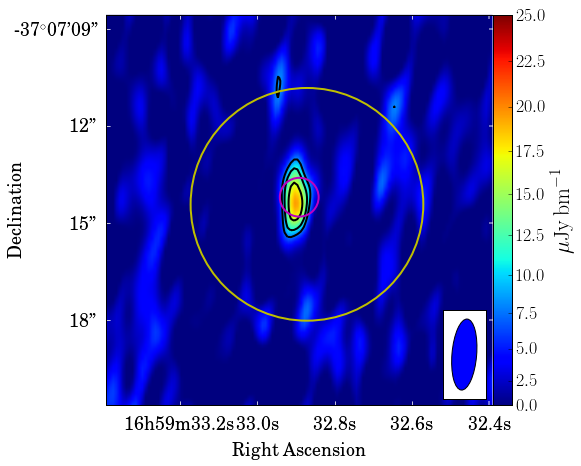

In [6]:
fig=plt.figure(figsize=(9,7))
#plt.rcdefaults()
plt.rc('xtick.major', size=4)
plt.rc('xtick', color='w', labelsize='large')
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)
ax1 = fig.add_subplot(111, projection=wmap1.celestial)
im=plt.imshow(np.nan_to_num(data1[0,0,:,:])*1e6,origin="lower",\
cmap=cm.get_cmap('jet', 500),norm=colors.PowerNorm(gamma=gm),vmin=vmin*1e6,vmax=vmax*1e6)
cbar=plt.colorbar(im, orientation='vertical',fraction=0.04,pad=0)
cbar.set_label('$\\mu{\\rm Jy\, bm}^{-1}$',size=22)
ax1.tick_params(axis='both', which='major', labelsize=18,width=5,length=7,color='k')
ax1.tick_params(axis='both', which='minor', labelsize=18,width=5,length=7,color='k')
ax1.coords['ra'].set_axislabel('Right Ascension',size=18)
ax1.coords['dec'].set_axislabel('Declination',minpad=-0.1,size=18)
ax1.coords['ra'].set_major_formatter('hh:mm:ss.s')
ax1.set_ylim(y1,y2)
ax1.set_xlim(x1,x2)
ae = AnchoredEllipse(ax1.transData, width=b_major, height=b_minor, angle=b_pa,\
                     loc=4, pad=0.5, borderpad=0.4, frameon=True)
ax1.add_artist(ae)
c1 = patches.Ellipse((xsw,ysw), 2.*radsw/cells,2.*radsw/cells,angle=0., linewidth=2, fill=False,color='y',zorder=5)
c2 = patches.Ellipse((xch,ych), 2.*radch/cells,2.*radch/cells,angle=0., linewidth=2, fill=False,color='m',zorder=5)
ax1.add_patch(c2)
ax1.add_patch(c1)
plt.contour(X,Y,Z,levels,colors='k',linewidths=2,zorder=1)
ax1.coords['ra'].set_ticklabel(size=18)
#ax1.xticks.set_ticksize(3)
ax1.coords['dec'].set_ticklabel(size=18)
cbar.ax.tick_params(labelsize=18)
#plt.savefig(datadir+'radio_image_wcsaxes.pdf,bbox_inches='tight')

###**Zoomed inset WCS axes version**

In [28]:
full_x1=1850
full_x2=2270
full_y1=1890
full_y2=2320
zoom_x1=2037
zoom_x2=2081
zoom_y1=2082
zoom_y2=2140

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x614012910>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x61401e390>)

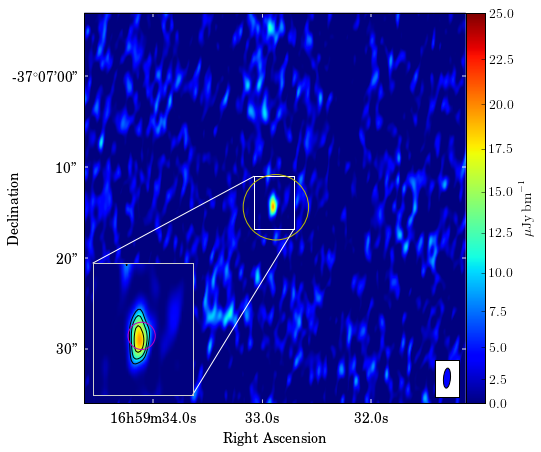

In [41]:
fig=plt.figure(figsize=(9,7))
#plt.rcdefaults()
plt.rc('xtick.major', size=4)
plt.rc('xtick', color='w', labelsize='large')
ax1 = fig.add_subplot(111, projection=wmap1.celestial)
im=plt.imshow(np.nan_to_num(data1[0,0,:,:])*1e6,origin="lower",\
cmap=cm.get_cmap('jet', 500),norm=colors.PowerNorm(gamma=gm),vmin=vmin*1e6,vmax=vmax*1e6)
cbar=plt.colorbar(im, orientation='vertical',fraction=0.04,pad=0)
cbar.set_label('$\\mu{\\rm Jy\, bm}^{-1}$')
ax1.tick_params(axis='both', which='major', labelsize=15,width=3,length=7,color='k')
ax1.tick_params(axis='both', which='minor', labelsize=15,width=1,length=7,color='k')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination',minpad=-0.1)
ax1.coords['ra'].set_major_formatter('hh:mm:ss.s')
ax1.set_xlim(full_x1,full_x2)
ax1.set_ylim(full_y1,full_y2)
ae = AnchoredEllipse(ax1.transData, width=b_major, height=b_minor, angle=b_pa,\
                     loc=4, pad=0.5, borderpad=0.4, frameon=True)
ax1.add_artist(ae)
c1 = patches.Ellipse((xsw,ysw), 2.*radsw/cells,2.*radsw/cells,angle=0., linewidth=1, fill=False,color='y',zorder=5)
ax1.add_patch(c1)
axins = zoomed_inset_axes(ax1, 2.5, loc=3)
im0=axins.imshow(np.nan_to_num(data1[0,0,:,:])*1e6,cmap=cm.get_cmap('jet', 500),origin="lower",\
                 norm=colors.PowerNorm(gamma=gm),vmin=vmin*1e6,vmax=vmax*1e6)
plt.contour(X,Y,Z,levels,colors='k',linewidths=1)
c2 = patches.Ellipse((xch,ych), 2.*radch/cells,2.*radch/cells,angle=0., linewidth=1, fill=False,color='m',zorder=5)
axins.add_patch(c2)
axins.spines['bottom'].set_color('0.8')
axins.spines['top'].set_color('0.8')
axins.spines['left'].set_color('0.8')
axins.spines['right'].set_color('0.8')
plt.setp(axins, xticks=[], yticks=[])
axins.xaxis.set_major_formatter(plt.NullFormatter())
axins.yaxis.set_major_formatter(plt.NullFormatter())
# sub region of the original image
axins.set_xlim(zoom_x1,zoom_x2)
axins.set_ylim(zoom_y1,zoom_y2)
mark_inset(ax1, axins, loc1=2, loc2=4, fc="none", ec="1",lw=1)
#plt.savefig(datadir+'radio_image_zoomed.pdf',bbox_inches='tight')

##**Aplpy version**

In [19]:
#make scaled version
fh = fits.open(fits_file1)
data = fh[0].data
header = fh[0].header
#mywcs = wcs.WCS(header)
#new_header = mywcs.to_header()
new_fh = fits.PrimaryHDU(data=data*1e6, header=header)
new_fh.writeto(fits_file1.strip('.fits')+'_scaledujy1.fits')
fits_file_sc=fits_file1.strip('.fits')+'_scaledujy1.fits'

INFO:astropy:Setting slices=[0, 0]


INFO: Setting slices=[0, 0] [aplpy.core]
INFO

INFO:astropy:Setting slices=[0, 0]


: Setting slices=[0, 0] [aplpy.core]


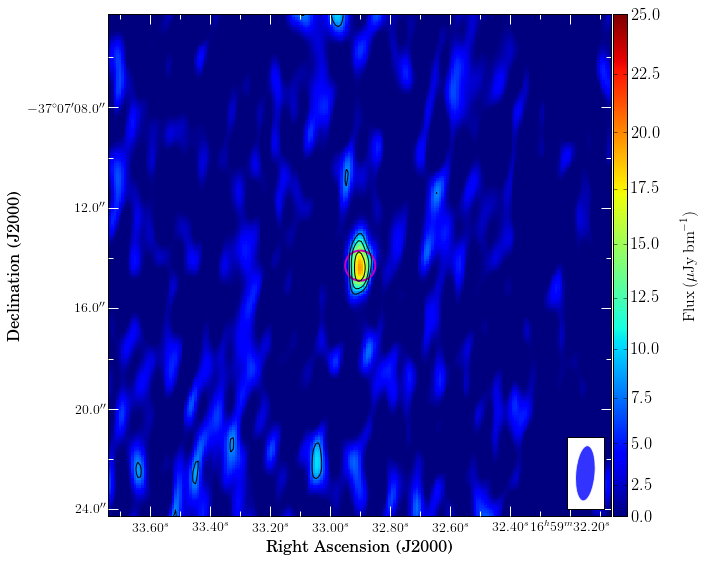

In [42]:
fits_file_sc=fits_file1.strip('.fits')+'_scaledujy1.fits'
plt.rc('xtick', color='k', labelsize='large')
fig=plt.figure()
img = aplpy.FITSFigure(fits_file_sc)
img.show_colorscale(cmap=cm.get_cmap('jet', 500),vmin=vmin*1e6,vmax=vmax*1e6,stretch='power',exponent=gm)
img.show_contour(fits_file_sc,dimensions=[0,1],slices=[0,0],levels=levels*1e6,colors='black',linestyles='-')
img.tick_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')
img.add_colorbar()
img.colorbar.set_location('right')
img.colorbar.set_axis_label_text('${\\rm Flux}\,(\\mu{\\rm Jy\,bm}^{-1})$')
img.colorbar.set_axis_label_font(size=16)
img.colorbar.set_width(0.2)
img.colorbar.set_pad(0.03)
img.colorbar.set_font(size='large', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
img.colorbar.set_axis_label_pad(20)
#img.colorbar.show()
img.show_circles(coord_chandra.ra.deg, coord_chandra.dec.deg, Angle(radch*u.arcsec).deg,color='m',linewidth=2)
img.add_beam()
img.beam.set_major((b_major*cells) * u.arcsecond)
img.beam.set_minor((b_minor*cells) * u.arcsecond)
img.beam.set_angle((b_pa-90.) * u.degree)
img.beam.set_corner('bottom right')
img.beam.set_frame(True)
img.beam.set_alpha(0.8)
img.beam.set_color('white')
img.beam.set_edgecolor('white')
img.beam.set_facecolor('blue')
img.axis_labels.set_xtext('Right Ascension (J2000)')
img.axis_labels.set_ytext('Declination (J2000)')
img.axis_labels.set_font(size='large', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')
img.ticks.set_color('white')
img.ticks.set_length(10)
img.ticks.set_linewidth(1)
img.ticks.set_minor_frequency(2)
img.recenter(coord_radio.ra.deg,coord_radio.dec.deg,width=wid.deg,height=wid.deg)
#img.set_theme('publication')
#img.save('datadir+'radio_image_aplpy.pdf)